<a href="https://colab.research.google.com/github/vijayshankarrealdeal/intro_to_pytorch-Gans/blob/main/pytorch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import tqdm
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([ transforms.ToTensor(),transforms.Normalize((0.5,0.5),(0.5,0.5))])

In [5]:
train_set = torchvision.datasets.FashionMNIST(root = './data',train = True,download=True,transform=transform)
test_set = torchvision.datasets.FashionMNIST(root = './data',train = False,download=True,transform=transform)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_set.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_set.targets.shape

torch.Size([60000])

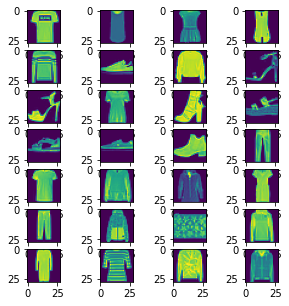

In [8]:
fig = plt.figure(figsize=(5,5))
row = 7
col = 4
for i in range(1,col*row+1):
  ima = train_set.data[i]
  fig.add_subplot(row,col,i)
  plt.imshow(ima)
plt.show()

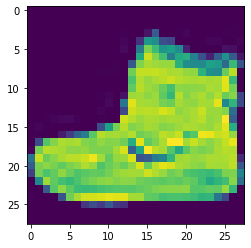

In [9]:
plt.imshow(train_set.data[0])

In [10]:
train_set.data.shape

torch.Size([60000, 28, 28])

In [11]:
class CNNetwork(nn.Module):
  def __init__(self,im_channel = 1,output_channel = 6,hidden_units = 64):
    super(CNNetwork,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = F.relu(t)
    t = self.fc2(t)
    t = F.relu(t)
    t = self.out(t)
    return t

 

In [12]:
epochs = 20
loss = torch.nn.NLLLoss()
model = CNNetwork().to('cuda')
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
print(model)

CNNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [19]:
batch_size = 64


In [21]:
i = 1
start = 1
while i < epochs:
  for im in range(batch_size):
    end = batch_size*i
    y_pred = model((train_set.data[start:end]).to('cuda'))
    optimizer.zero_grad()
    loss = loss_fn(y_pred,label.to('cuda'))
    print(loss)
    loss.backward()
    optimizer.step()
  start = end
  i += 1

RuntimeError: ignored